In [1]:
#@title Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [2]:
#@title Importing Dataset
df = pd.read_csv("CAR DETAILS.csv")
df = pd.DataFrame(df)

In [3]:
df.shape

(4340, 8)

In [4]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


In [5]:
#@title Brand & Model name separation
brand = []
model = []
for i in  df['name']:
  brand.append(i.split(" ")[0])
  model.append(" ".join(i.split(" ")[1:]))

In [6]:
#@title Updating Existing DataFrame

df['brand'] = brand
df['model'] = model

#Changing the order of the columns in dataframe
df = df.iloc[:,[8,9,1,3,4,5,6,7,2]]
df.head(2)

,brand,model,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti,800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti,Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          4340 non-null   object
 1   model          4340 non-null   object
 2   year           4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
 8   selling_price  4340 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [8]:
df.isnull().sum()

brand            0
model            0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
selling_price    0
dtype: int64

In [9]:
cars = df.model.unique()
print(f"We have total {len(cars)} numbers of different cars")


We have total 1491 numbers of different cars


In [10]:
# Checking for the model names
allModels = df.model.unique()
for i in allModels[:500:3]:
  print(i)

800 AC
RediGO T Option
Xcent 1.2 Kappa S
Celerio Green VXI
Ciaz VXi Plus
XF 2.2 Litre Luxury
Q5 2.0 TDI
A6 2.0 TDI  Design Edition
Corolla Altis G AT
E-Class E 200 CGI Elegance
Q7 35 TDI Quattro Premium
City i DTEC V
Scorpio LX
Alto LXi
i20 Sportz 1.4 CRDi
i20 2015-2017 Sportz Option 1.4 CRDi
Indica DLS
Tavera Neo LS B3 - 7(C) seats BSIII
Indigo Classic Dicor
Swift 1.3 VXi
Civic 1.8 V AT
Getz GLS
Elite i20 Diesel Era
Creta 1.6 SX Option
Duster 85PS Diesel RxL Optional
A6 2.0 TDI Premium Plus
RediGO 1.0 S
E-Class Exclusive E 200 BSIV
SX4 Zxi BSIII
Sonata CRDi M/T
Elite i20 Sportz Plus Dual Tone BSIV
SX4 ZXI MT BSIV
Verna 1.6 VTVT AT S Option
Ertiga VDI
Baleno Delta 1.2
Innova 2.5 GX (Diesel) 8 Seater
Amaze S i-Vtech
Cruze LTZ
i10 Sportz 1.1L
EON Era Plus
Bolt Quadrajet XE
i20 1.2 Asta
Santro LE
Getz 1.3 GLS
Wagon R DUO LPG
City i VTEC SV
Swift VVT ZXI
Beat LT
Santro Xing XG
800 Std BSII
Alto K10 VXI
i20 Asta
Vento Celeste 1.5 TDI Highline AT
SX4 Zxi with Leather BSIII
Xylo E4
Beat Diese

In [11]:
# We are taking first two word as the model name

models = []

for i in df.model:
  models.append(" ".join(i.split(" ")[:2]))

df.model = models # fit the values to the dataframe

In [12]:
#@title Taking some insights on max km driven and min km driven

max_km = df.km_driven.max()
min_km = df.km_driven.min()
df[(df['km_driven'] == max_km) | (df['km_driven'] == min_km)]   # Very Intresting

,brand,model,year,km_driven,fuel,seller_type,transmission,owner,selling_price
1243,Maruti,Swift VXI,2009,806599,Petrol,Dealer,Manual,First Owner,250000
1312,Mahindra,Quanto C6,2014,1,Diesel,Individual,Manual,Second Owner,250000


In [13]:
#@title Insights on max price and min price

max_price  = df.selling_price.max()
min_price = df['selling_price'].min()
# df.query(f"selling_price == {max_price} or selling_price == {min_price}")
df[(df['selling_price'] == max_price) | (df['selling_price'] == min_price)]

,brand,model,year,km_driven,fuel,seller_type,transmission,owner,selling_price
2662,Ford,Ikon 1.6,2005,25000,Petrol,Individual,Manual,Second Owner,20000
3872,Audi,RS7 2015-2019,2016,13000,Petrol,Dealer,Automatic,First Owner,8900000


It seems that, the third hand value makes the car value (i.e. selling price)always **less**. Though the *Mahindra Quanto C6* had driven only 1 km but it have the same selling price like the most driven car *Maruti Swift CXI BSIII*. Even for the lowest selling priced car having **second owner**.

In [14]:
# !pip install --pre pycaret --q


# from pycaret.regression import *

# s = setup(df2, target = 'selling_price')

In [15]:
# best = compare_models()

In [16]:
# evaluate = evaluate_model(best)

int64


Text(0, 0.5, 'Selling Price in Lakhs')

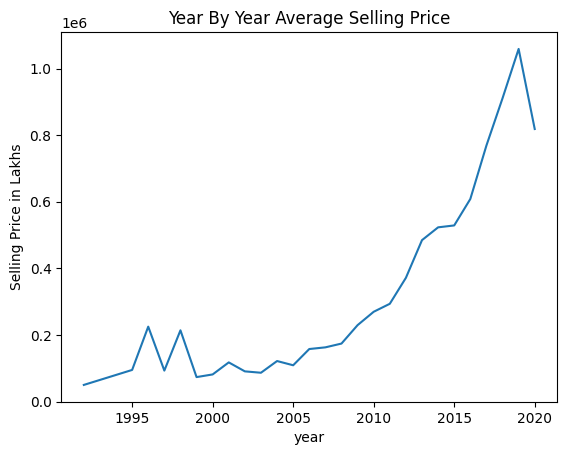

In [17]:
#@title Year by year average selling price of the cars:

print(df.selling_price.dtype)
data = df.groupby('year')['selling_price'].mean()
sns.lineplot(data)
plt.title("Year By Year Average Selling Price")
plt.ylabel("Selling Price in Lakhs")


Text(0.5, 1.0, 'Car Sold Year Wise')

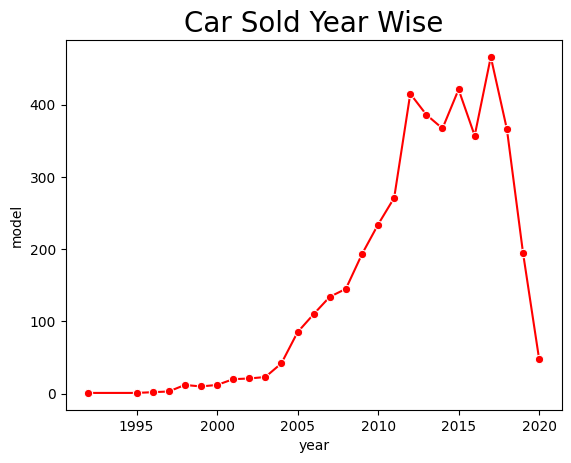

In [18]:
#@title Car sold year wise:
data = df.groupby('year')['model'].count()
sns.lineplot(data, marker='o', color='red')
plt.title("Car Sold Year Wise", fontsize= 20)

In [19]:
#@title 3 Top Selling Models: 

modelCount = df.model.value_counts()
Top3 = modelCount.sort_values(ascending= False)[:3]
Top3


Wagon R        164
Swift Dzire    139
Grand i10      112
Name: model, dtype: int64

In [20]:
Maruti_models = (df['model'].where(df['brand']=='Maruti'))

Maruti_models.dropna(inplace=True)

Maruti_models = list(Maruti_models)

In [21]:
for i in Top3.index:
  if i in Maruti_models:
    print("Yes, Maruti Brand")

Yes, Maruti Brand
Yes, Maruti Brand


All the top 3 models are from Maruti brand

In [22]:
#@title Top 3 Brands: 

brandCount = df.brand.value_counts()
Top3brand = brandCount.sort_values(ascending= False)[:3]
Top3brand


Maruti      1280
Hyundai      821
Mahindra     365
Name: brand, dtype: int64

<ipython-input-23-cccc66d088aa>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = df.corr()


<Axes: >

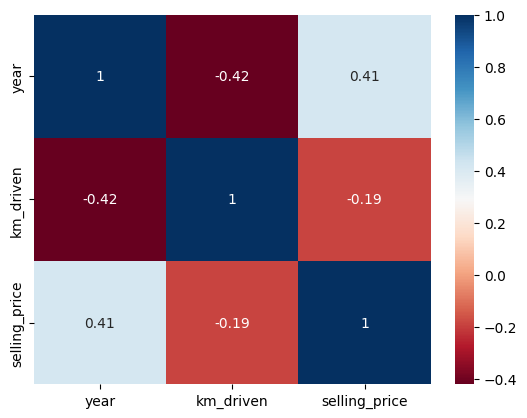

In [23]:
#@title Corelation among the numerical columns

corr_data = df.corr()

sns.heatmap(corr_data, annot=True, cmap='RdBu')

#here selling price and km driven has negative correlation i.e. if the car has driven so much then its price should be less and between 
# year and selling price the corelation is positive so year by year selling price is rising.

In [24]:
df.describe()

# Selling price and km_driven column must having outliers. Cause 75 percent of selling_price is between 6 lakh for but the max is 89 lakh
# and for km_driven 75 percent data is in 90 thousand but max value showing 8 lakh.

,year,km_driven,selling_price
count,4340.000000,4340.000000,4.340000e+03
mean,2013.090783,66215.777419,5.041273e+05
std,4.215344,46644.102194,5.785487e+05
min,1992.000000,1.000000,2.000000e+04
25%,2011.000000,35000.000000,2.087498e+05
50%,2014.000000,60000.000000,3.500000e+05
75%,2016.000000,90000.000000,6.000000e+05
max,2020.000000,806599.000000,8.900000e+06


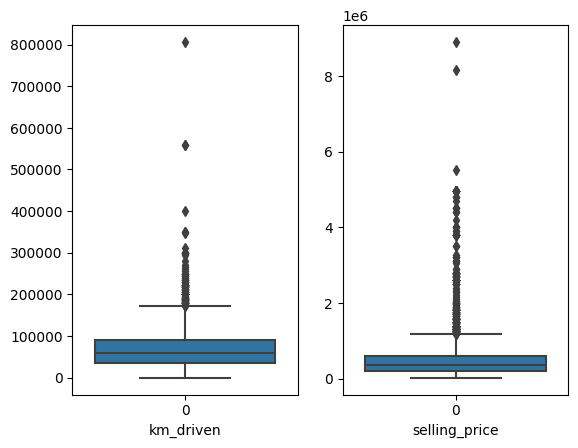

In [25]:
#@title Plotting the outliers

plt.subplot(1, 2, 1) # row 1, col 2,  at index 1
sns.boxplot(df['km_driven'])
plt.xlabel("km_driven")

plt.subplot(1, 2, 2) # # row 1, col 2, at index 2
sns.boxplot(df['selling_price'])
plt.xlabel("selling_price")

plt.show()

In [26]:
# #@title Plotting the distplots

# plt.figure( )
# plt.subplot(1, 2, 1) # row 1, col 2,  at index 1
# sns.displot(df['km_driven'])
# plt.xlabel("km_driven")

# plt.subplot(1, 2, 2) # # row 1, col 2, at index 2
# sns.displot(df['selling_price'])
# plt.xlabel("selling_price")

# plt.show()

# Data Preprocessing

In [27]:
#@title Outliers Removing Function

def removeOutlier(col):
  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)
  IQR = Q3-Q1
  upper_range = Q3 + (1.5*IQR)
  lower_range = Q1 - (1.5*IQR)
  
  for i in range(len(col)):
    if col[i] >upper_range:
      col[i]=upper_range
    elif col[i] < lower_range:
      col[i]=lower_range
    else: continue



In [28]:
#@title Removing Outliers

removeOutlier(df['km_driven'])
removeOutlier(df['selling_price'])
df.head(2)

<ipython-input-27-0320282ea2ef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[i]=upper_range
<ipython-input-27-0320282ea2ef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[i]=upper_range


,brand,model,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti,800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000.0
1,Maruti,Wagon R,2007,50000,Petrol,Individual,Manual,First Owner,135000.0


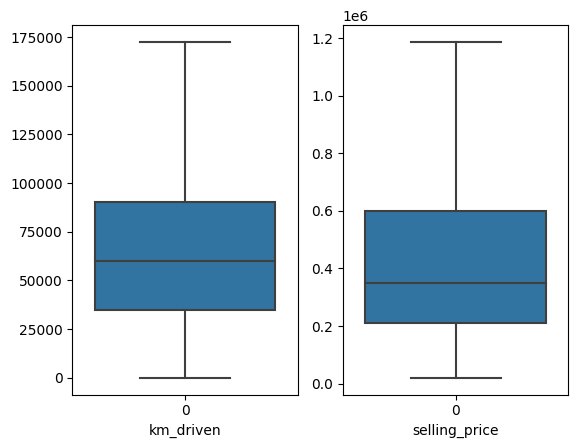

In [29]:
#@title Columns After removing outlier

plt.subplot(1, 2, 1) # row 1, col 2,  at index 1
sns.boxplot(df['km_driven'])
plt.xlabel("km_driven")

plt.subplot(1, 2, 2) # # row 1, col 2, at index 2
sns.boxplot(df['selling_price'])
plt.xlabel("selling_price")

plt.show()

In [30]:
#@title Making a copy of the dataset
dfEnc = df.copy()
dfEnc.head(2)

,brand,model,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti,800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000.0
1,Maruti,Wagon R,2007,50000,Petrol,Individual,Manual,First Owner,135000.0


In [31]:
# Update the owner columnw
dfEnc.loc[dfEnc['owner'] == "Test Drive Car", "owner"]="other"
dfEnc.loc[dfEnc['owner'] == "Fourth & Above Owner", "owner"]="other"
dfEnc.loc[dfEnc['owner'] == "Third Owner", "owner"]="other"

In [32]:
dfEnc.owner.value_counts()

First Owner     2832
Second Owner    1106
other            402
Name: owner, dtype: int64

In [33]:
#@title Dataset Spliting

X = dfEnc.iloc[:, :-1]
Y = dfEnc.iloc[:, -1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=371)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3472, 8)
(3472,)
(868, 8)
(868,)


In [34]:
dfEnc['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [35]:
dfEnc.head(2)

,brand,model,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti,800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000.0
1,Maruti,Wagon R,2007,50000,Petrol,Individual,Manual,First Owner,135000.0


In [36]:
(dfEnc.owner.value_counts().index.sort_values(ascending=False))


Index(['other', 'Second Owner', 'First Owner'], dtype='object')

In [37]:
max(dfEnc.km_driven)

172500

In [38]:
#@title Encoding::
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
ohe = OneHotEncoder()
ohe.fit(dfEnc[['fuel', 'seller_type', 'transmission', 'owner']])

ore = OrdinalEncoder()
ore.fit(dfEnc[['brand', 'model']])
# ore.categories_

ctg = list[dfEnc.model.unique()]

ct = ColumnTransformer(transformers=[
    ('transformer1', OneHotEncoder(categories= ohe.categories_), ['fuel', 'seller_type', 'transmission', 'owner']),   # passing columns by there index
    ('transformer2', OrdinalEncoder(categories=ore.categories_), ['brand', 'model'])
], remainder='passthrough')

### Here I have used column transformer so that I can use different encoders on different columns simentenously and other numerical columns remain as it is.
### As brand and model have so much categories that's why there I used ordinal encoding, else if I used onehotencoding there then there will be very long
### dimensions and that is unnecessary.

#Model building

In [39]:
#@title Importing Regression models

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#creating model objects
reg_lr = LinearRegression()
reg_ridge = Ridge(alpha = 0.5, max_iter=2000, solver='auto') #by default solver = 'auto'
reg_lasso = Lasso(alpha = 0.5, max_iter=2000)
reg_dt = DecisionTreeRegressor(min_samples_leaf=20)
reg_rf = RandomForestRegressor()
reg_ada = AdaBoostRegressor()


In [40]:
models = [reg_lr, reg_ridge, reg_lasso, reg_dt, reg_rf, reg_ada]

for i in range(len(models)):
  print(f"{models[i]}::::::::::::::")
  model = models[i]
  model.fit(ct.fit_transform(x_train), y_train)
  print(f"{r2_score(y_test, model.predict(ct.fit_transform(x_test)))}\n\n")

LinearRegression()::::::::::::::
0.6411259997195794


Ridge(alpha=0.5, max_iter=2000)::::::::::::::
0.641128437260464


Lasso(alpha=0.5, max_iter=2000)::::::::::::::


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.649e+13, tolerance: 3.320e+10
  model = cd_fast.enet_coordinate_descent(


0.6411261340413035


DecisionTreeRegressor(min_samples_leaf=20)::::::::::::::
0.7876577284604764


RandomForestRegressor()::::::::::::::
0.8901254983950289


AdaBoostRegressor()::::::::::::::
0.5084539197283656




## Checking the best model with random generated dataset

In [41]:
randomData = dfEnc.sample(20)
randomData.head(2)

,brand,model,year,km_driven,fuel,seller_type,transmission,owner,selling_price
3677,Maruti,Alto K10,2017,50000,Petrol,Individual,Manual,Second Owner,320000.0
2136,Tata,Indica Vista,2011,60000,Diesel,Individual,Manual,other,195000.0


In [42]:
# Splitting Data
randX = randomData.iloc[:, :-1]
randY = randomData.iloc[:, -1]
print(randX.shape)
print(randY.shape)

(20, 8)
(20,)


In [43]:
randX_tr = ct.fit_transform(randX) #Transforming the data for model feeding

In [44]:
# Feeding the model and Checking model performance

yPred = reg_rf.predict(randX_tr)
r2_score(randY, yPred)

0.9790037691642695

**As we can see my Random Forest Regressor Model works pretty well. Using this as my final model for this project.**

# Dump the model as Pickel file

In [45]:
import pickle
pickle.dump(reg_rf, open("finalModel.pkl", 'wb'))

#Saving the random dataset

In [46]:
randomData.to_csv("SampleDataset.csv")

In [67]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
ohe = OneHotEncoder()
ohe.fit(dfEnc[['fuel', 'seller_type', 'transmission', 'owner']])

ore = OrdinalEncoder()
ore.fit(dfEnc[['brand', 'model']])

ct_ = ColumnTransformer(transformers=[
    ('transformer1', OneHotEncoder(categories= ohe.categories_, handle_unknown='ignore'), [4,5,6,7]),   # passing columns by there index
    ('transformer2', OrdinalEncoder(categories=ore.categories_, handle_unknown='use_encoded_value', unknown_value=-1), [0,1])
], remainder='passthrough')



In [68]:
# !pip install pipeline --q
import pipeline
pipe = make_pipeline(ct_, reg_rf)

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
r2_s = r2_score(y_test, y_pred)
print(r2_s)

0.8925405935701926


In [69]:
#@title Dumping pipe to Pickle file

pickle.dump(pipe, open("pipe.pkl",'wb'))